In [1]:
import feature_extractors.MFCC
import feature_extractors.power_spectral_density
import feature_extractors.spectral_centroid
import feature_extractors.spectral_flux
import feature_extractors.spectral_rolloff
import feature_extractors.spectral_flatness
import feature_extractors.MFCC_deltas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# from matplotlib import cm
matplotlib.style.use('ggplot')
%matplotlib notebook

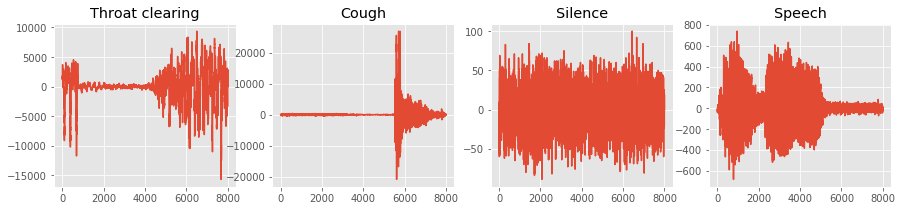

In [5]:
# Plot audio waveform

filename_array = ["../CSVs/cough-data-throatclearing-3.csv",
                  "../CSVs/cough-data-cough-7.csv",
                  "../CSVs/cough-data-silence-0.csv",
                  "../CSVs/cough-data-speech-1.csv",
                 ]
file_array_array = []
for file in filename_array:
    file_as_array = np.genfromtxt(file, delimiter=",")
    file_array_array.append(file_as_array[:,1:])

fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")

axes = [ax1, ax2, ax3, ax4]    
count = 0

count = 0
for fil_arr in file_array_array:
    axes[count].plot(range(len(fil_arr[7])), fil_arr[7])
    count +=1
plt.show()




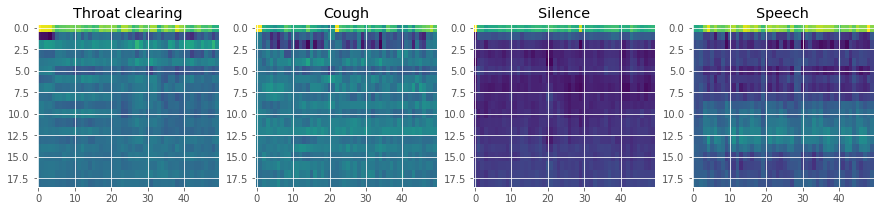

In [6]:
#Plot MFCC

fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")

axes = [ax1, ax2, ax3, ax4]    
count = 0

for fil_arr in file_array_array:
    mfcc = []
    for index in range(50):
        mfcc_arr = feature_extractors.MFCC.get_feature_vector(fil_arr[index][:-1])[0][1:]
#         print(mfcc_arr)
        mfcc.append(mfcc_arr)
    mfcc = np.swapaxes(mfcc, 1, 0)
    axes[count].imshow(mfcc, aspect="auto")
#     axes[count].plot(mfcc_arr)
#     axes[count].grid(False)
#     axes[count].invert_yaxis()
    count +=1
plt.show()

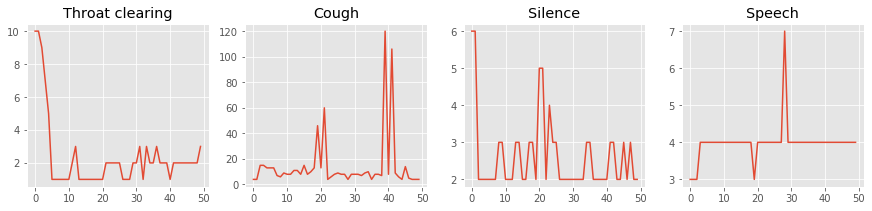

In [17]:
#Plot power spectral density
fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")
axes = [ax1, ax2, ax3, ax4]    
count = 0

for fil_arr in file_array_array:
    psd = []
    psd_armx = []
    for index in range(0,50):
        psd_arr = feature_extractors.power_spectral_density.get_feature_vector(fil_arr[index])[0]
        psd_armx.append(psd_arr)
        psd.append(psd_arr)
#     psd = np.swapaxes(psd, 1, 0)
#     axes[count].imshow(psd[0:25], aspect="auto")
    axes[count].plot(psd_armx)
#     axes[count].grid(False)
#     axes[count].invert_yaxis()
    count +=1
plt.show()

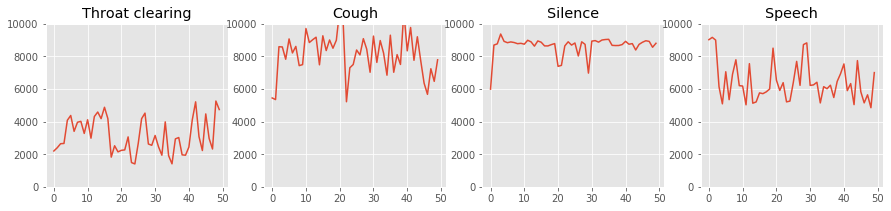

In [8]:
# Plot spectral centroids

fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")

y_limit = 10 ** 4
ax1.set_ylim([0,y_limit])
ax2.set_ylim([0,y_limit])
ax3.set_ylim([0,y_limit])
ax4.set_ylim([0,y_limit])

axes = [ax1, ax2, ax3, ax4]    
count = 0
index = 5
for fil_arr in file_array_array:
    centroid = []
    for index in range(0,50):
        centroid_arr = feature_extractors.spectral_centroid.get_feature_vector(fil_arr[index])[0]
        centroid.append(centroid_arr[0])
#     centroid = np.swapaxes(centroid, 1, 0)
    axes[count].plot(centroid)
#     axes[count].imshow(centroid, aspect="auto")
#     axes[count].grid(False)
#     axes[count].invert_yaxis()
    count +=1

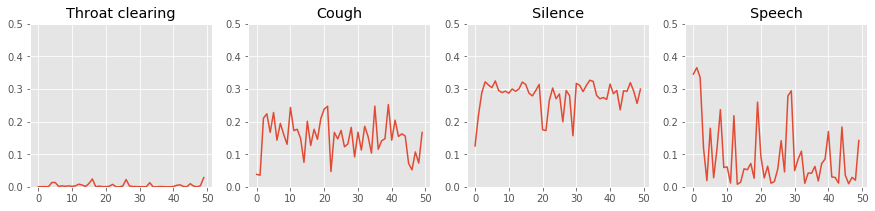

In [9]:
# Plot spectral flatness

fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")

y_limit = 0.5
ax1.set_ylim([0,y_limit])
ax2.set_ylim([0,y_limit])
ax3.set_ylim([0,y_limit])
ax4.set_ylim([0,y_limit])

axes = [ax1, ax2, ax3, ax4]    
count = 0

for fil_arr in file_array_array:
    flatness = []
    for index in range(0,50):
        flatness_arr = feature_extractors.spectral_flatness.get_feature_vector(fil_arr[index])[0]
        flatness.append(flatness_arr[0])
#     centroid = np.swapaxes(flatness, 1, 0)
#     axes[count].imshow(flatness, aspect="auto")
#     axes[count].grid(False)
#     axes[count].invert_yaxis()
    axes[count].plot(flatness)
    count +=1

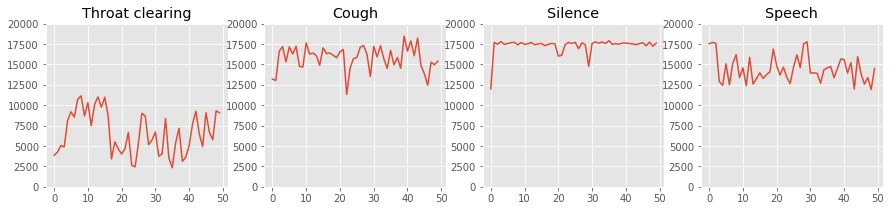

In [18]:
fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")

y_limit = 20000
ax1.set_ylim([0,y_limit])
ax2.set_ylim([0,y_limit])
ax3.set_ylim([0,y_limit])
ax4.set_ylim([0,y_limit])

axes = [ax1, ax2, ax3, ax4]    
count = 0

for fil_arr in file_array_array:
    flatness = []
    for index in range(0, 50):
        flatness_arr = feature_extractors.spectral_rolloff.get_feature_vector(fil_arr[index])[0]
        flatness.append(flatness_arr[0])
#     flatness = np.swapaxes(flatness, 1, 0)
#     axes[count].imshow(flatness, aspect="auto")
    axes[count].plot(flatness)
    count +=1

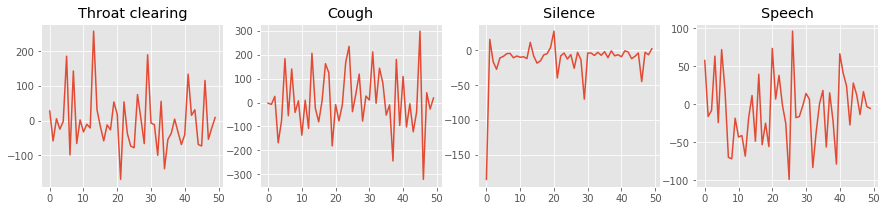

In [15]:
fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")
# ax2 = plt.axes([0, 0.6, 1, 1])

# y_limit = 0.5
# ax1.set_ylim([0,y_limit])
# ax2.set_ylim([0,y_limit])
# ax3.set_ylim([0,y_limit])
# ax4.set_ylim([0,y_limit])

axes = [ax1, ax2, ax3, ax4]    
count = 0

for fil_arr in file_array_array:
    mfcc_deltas = []
    for index in range(0,50):
        mfcc_deltas_arr = feature_extractors.MFCC_deltas.get_feature_vector(fil_arr[index])[0]
        mfcc_deltas.append(mfcc_deltas_arr[0])
#     mfcc_deltas = np.swapaxes(mfcc_deltas, 1, 0)
    axes[count].plot(mfcc_deltas)
#     axes[count].imshow(mfcc_deltas, aspect="auto")
#     axes[count].grid(False)
#     axes[count].invert_yaxis()
    count +=1

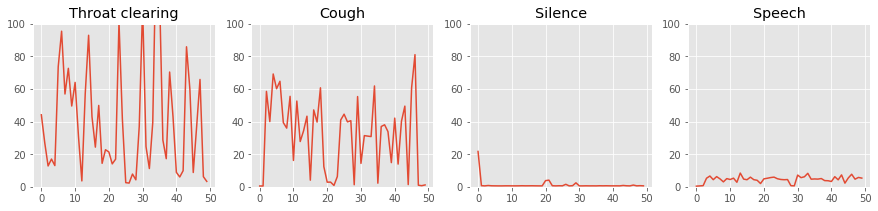

In [19]:
fig1 = plt.figure(figsize=(15, 3))
ax1 = fig1.add_subplot(141)
ax2 = fig1.add_subplot(142)
ax3 = fig1.add_subplot(143)
ax4 = fig1.add_subplot(144)
ax1.title.set_text("Throat clearing")
ax2.title.set_text("Cough")
ax3.title.set_text("Silence")
ax4.title.set_text("Speech")
# ax2 = plt.axes([0, 0.6, 1, 1])

y_limit = 100
ax1.set_ylim([0,y_limit])
ax2.set_ylim([0,y_limit])
ax3.set_ylim([0,y_limit])
ax4.set_ylim([0,y_limit])

axes = [ax1, ax2, ax3, ax4]    
count = 0
index = 100
for fil_arr in file_array_array:
    spectral_flux = []
    for index in range(0,50):
        spectral_flux_arr = feature_extractors.spectral_flux.get_feature_vector(fil_arr[index][1:])[0]
        spectral_flux.append(spectral_flux_arr)
#         print(mfcc_deltas_arr[1])
#         spectral_flux.append(spectral_flux_arr)
#     mfcc_deltas = np.swapaxes(mfcc_deltas, 1, 0)
#     axes[count].imshow(mfcc_deltas, aspect="auto")
    axes[count].plot(spectral_flux)
    count +=1
    
